
<span style="float:right"><a href="http://moldesign.bionano.autodesk.com/" target="_blank" title="About">About</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://forum.bionano.autodesk.com/c/Molecular-Design-Toolkit" target="_blank" title="Forum">Forum</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://github.com/autodesk/molecular-design-toolkit/issues" target="_blank" title="Issues">Issues</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="http://bionano.autodesk.com/MolecularDesignToolkit/explore.html" target="_blank" title="Tutorials">Tutorials</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="http://autodesk.github.io/molecular-design-toolkit/" target="_blank" title="Documentation">Documentation</a></span>
</span>
![Molecular Design Toolkit](img/Top.png)
<br>


<center><h1>Tutorial 2: Playing with proteins</h1></center>

Here, you'll see how to build, visualize, and simulate a protein structure from the PDB.

In [1]:
import moldesign as mdt
from moldesign import units as u

%matplotlib inline
import numpy as np
from matplotlib.pylab import *
try: import seaborn
except ImportError: pass

PDBFixer could not be imported; using remote docker container
PySCF not installed; using remote docker container
Reading configuration from /Users/aaronvirshup/.moldesign/moldesign.yml


Contents
=======
---
 - [1. Download from PDB](#1.-Download-from-PDB)
 - [2. Strip water and assign forcefield](#2.-Strip-water-and-assign-forcefield)
 - [3. Set up energy model and minimize](#3.-Set-up-energy-model-and-minimize)
 - [4. Add integrator and run dynamics](#4.-Add-integrator-and-run-dynamics)
 - [5. Some simple analysis](#5.-Some-simple-analysis)

# 1. Download from PDB
In this example, we'll download `1YU8`, a structure of the Villin Headpiece.

In [2]:
one_yu8 = mdt.from_pdb('1YU8')
one_yu8.draw()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [3]:
one_yu8

### Molecule: "1YU8" (600 atoms)

<a href="http://www.rcsb.org/pdb/explore.do?structureId=1YU8" target="_blank">HIGH-RESOLUTION CRYSTAL STRUCTURES OF VILLIN HEADPIECE AND MUTANTS WITH REDUCED F-ACTIN BINDING ACTIVITY.</a>

**Mass**: 8150.00 amu

**Formula**: C<sub>325</sub>N<sub>85</sub>O<sub>189</sub>S<sub>1</sub>

**Charge**: 0.0 elementary_charge

### Residues

| chain | protein | dna | rna | unknown | water | solvent |
|-|-|-|-|-|-|-|-|
| <b>X</b> | 64 |  |  |  | 92 |  ||

### Biopolymer chains

**X**: <span style="word-wrap:break-word;font-family:monospace"><span title="PRO10 (MISSING), chain X" style="color:Red">P</span><span title="THR11 (MISSING), chain X" style="color:Red">T</span><span title="LYS12 (MISSING), chain X" style="color:Red">K</span><span title="LEU13 (idx 0), chain X">L</span><span title="GLU14 (idx 1), chain X">E</span><span title="THR15 (idx 2), chain X">T</span><span title="PHE16 (idx 3), chain X">F</span><span title="PRO17 (idx 4), chain X">P</span><span title="LEU18 (idx 5), chain X">L</span><span title="ASP19 (idx 6), chain X">D</span><span title="VAL20 (idx 7), chain X">V</span><span title="LEU21 (idx 8), chain X">L</span><span title="VAL22 (idx 9), chain X">V</span><span title="ASN23 (idx 10), chain X">N</span><span title="THR24 (idx 11), chain X">T</span><span title="ALA25 (idx 12), chain X">A</span><span title="ALA26 (idx 13), chain X">A</span><span title="GLU27 (idx 14), chain X">E</span><span title="ASP28 (idx 15), chain X">D</span><span title="LEU29 (idx 16), chain X">L</span><span title="PRO30 (idx 17), chain X">P</span><span title="ARG31 (idx 18), chain X">R</span><span title="GLY32 (idx 19), chain X">G</span><span title="VAL33 (idx 20), chain X">V</span><span title="ASP34 (idx 21), chain X">D</span><span title="PRO35 (idx 22), chain X">P</span><span title="SER36 (idx 23), chain X">S</span><span title="ALA37 (idx 24), chain X">A</span><span title="LYS38 (idx 25), chain X">K</span><span title="GLU39 (idx 26), chain X">E</span><span title="ASN40 (idx 27), chain X">N</span><span title="HIS41 (idx 28), chain X">H</span><span title="LEU42 (idx 29), chain X">L</span><span title="SER43 (idx 30), chain X">S</span><span title="ASP44 (idx 31), chain X">D</span><span title="GLU45 (idx 32), chain X">E</span><span title="ASP46 (idx 33), chain X">D</span><span title="PHE47 (idx 34), chain X">F</span><span title="LYS48 (idx 35), chain X">K</span><span title="ALA49 (idx 36), chain X">A</span><span title="VAL50 (idx 37), chain X">V</span><span title="PHE51 (idx 38), chain X">F</span><span title="GLY52 (idx 39), chain X">G</span><span title="MET53 (idx 40), chain X">M</span><span title="THR54 (idx 41), chain X">T</span><span title="ARG55 (idx 42), chain X">R</span><span title="SER56 (idx 43), chain X">S</span><span title="ALA57 (idx 44), chain X">A</span><span title="PHE58 (idx 45), chain X">F</span><span title="ALA59 (idx 46), chain X">A</span><span title="ASN60 (idx 47), chain X">N</span><span title="LEU61 (idx 48), chain X">L</span><span title="PRO62 (idx 49), chain X">P</span><span title="LEU63 (idx 50), chain X">L</span><span title="TRP64 (idx 51), chain X">W</span><span title="LYS65 (idx 52), chain X">K</span><span title="GLN66 (idx 53), chain X">Q</span><span title="GLN67 (idx 54), chain X">Q</span><span title="ASN68 (idx 55), chain X">N</span><span title="LEU69 (idx 56), chain X">L</span><span title="LYS70 (idx 57), chain X">K</span><span title="LYS71 (idx 58), chain X">K</span><span title="GLU72 (idx 59), chain X">E</span><span title="LYS73 (idx 60), chain X">K</span><span title="GLY74 (idx 61), chain X">G</span><span title="LEU75 (idx 62), chain X">L</span><span title="PHE76 (idx 63), chain X">F</span></span>

# 2. Strip water and assign forcefield

In [4]:
headpiece = mdt.Molecule([res for res in one_yu8.residues if res.type == 'protein'])

In [7]:
ff = mdt.forcefields.DefaultAmber()
protein = ff.create_prepped_molecule(headpiece)

Connecting to docker host at... done
Forcefield assignment: Success


# 3. Set up energy model and minimize

In [8]:
protein.set_energy_model(mdt.models.OpenMMPotential, implicit_solvent='obc')

In [9]:
mintraj = protein.minimize()

Created OpenMM kernel (Platform: OpenCL)
Reduced energy from -99.2682075377658 eV to -110.70757228527638 eV


In [10]:
mintraj.draw(display=False)

# 4. Add integrator and run dynamics

In [11]:
protein.set_integrator(mdt.integrators.OpenMMLangevin,
                       temperature=300*u.kelvin,
                       timestep=2.0*u.fs,
                       frame_interval=2.0*u.ps)

In [12]:
traj = protein.run(50*u.ps)

Created OpenMM kernel (Platform: OpenCL)
time / fs                 potential / eV                  kinetic / eV                    T / kelvin
0.0                    -110.707571364464                           0.0                           0.0
1998.0000000000014            -81.75115507028912            29.124189005182803             267.0661446907951
3995.9999999997813            -76.46193567913342            32.901638023671026            301.70500608378194
5993.999999999562            -76.46793927932444             33.63816605760306            308.45890067098964
7991.999999999341            -77.50788540420635             34.74905400282512            318.64564134421965
9990.000000000004            -75.63011217387931             33.46861699668099             306.9041513171676
11988.000000000671             -77.7501635867188             32.45585512702218             297.6172177661084
13986.000000001339            -77.46865308426227              33.0564295626339            303.124430313387

In [13]:
traj.draw()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# 5. Some simple analysis
As in tutorial 1, tutorial objects permit a range of timeseries-based analyses.

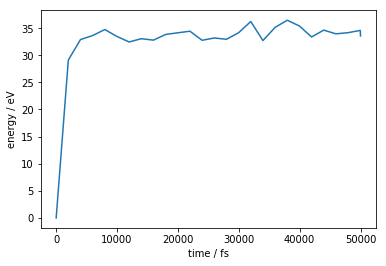

In [14]:
plot(traj.time, traj.kinetic_energy)
xlabel('time / %s' % u.default.time); ylabel('energy / %s' % u.default.energy)

In [21]:
protein

### Molecule: "Unnamed molecule from OpenMM copy" (1013 atoms)

**Mass**: 7187.10 amu

**Formula**: C<sub>325</sub>H<sub>505</sub>N<sub>85</sub>O<sub>97</sub>S<sub>1</sub>

**Charge**: 0.0 elementary_charge

**Potential model**: <moldesign.models.openmm.OpenMMPotential object at 0x119958208>

**Integrator**: <moldesign.integrators.openmm.OpenMMLangevin object at 0x115c92240>

### Residues

| chain | protein | dna | rna | unknown | water | solvent |
|-|-|-|-|-|-|-|-|
| <b>X</b> | 64 |  |  |  |  |  ||

### Biopolymer chains

**X**: <span style="word-wrap:break-word;font-family:monospace"><span title="LEU13 (idx 0), chain X">L</span><span title="GLU14 (idx 1), chain X">E</span><span title="THR15 (idx 2), chain X">T</span><span title="PHE16 (idx 3), chain X">F</span><span title="PRO17 (idx 4), chain X">P</span><span title="LEU18 (idx 5), chain X">L</span><span title="ASP19 (idx 6), chain X">D</span><span title="VAL20 (idx 7), chain X">V</span><span title="LEU21 (idx 8), chain X">L</span><span title="VAL22 (idx 9), chain X">V</span><span title="ASN23 (idx 10), chain X">N</span><span title="THR24 (idx 11), chain X">T</span><span title="ALA25 (idx 12), chain X">A</span><span title="ALA26 (idx 13), chain X">A</span><span title="GLU27 (idx 14), chain X">E</span><span title="ASP28 (idx 15), chain X">D</span><span title="LEU29 (idx 16), chain X">L</span><span title="PRO30 (idx 17), chain X">P</span><span title="ARG31 (idx 18), chain X">R</span><span title="GLY32 (idx 19), chain X">G</span><span title="VAL33 (idx 20), chain X">V</span><span title="ASP34 (idx 21), chain X">D</span><span title="PRO35 (idx 22), chain X">P</span><span title="SER36 (idx 23), chain X">S</span><span title="ALA37 (idx 24), chain X">A</span><span title="LYS38 (idx 25), chain X">K</span><span title="GLU39 (idx 26), chain X">E</span><span title="ASN40 (idx 27), chain X">N</span><span title="HIS41 (idx 28), chain X">H</span><span title="LEU42 (idx 29), chain X">L</span><span title="SER43 (idx 30), chain X">S</span><span title="ASP44 (idx 31), chain X">D</span><span title="GLU45 (idx 32), chain X">E</span><span title="ASP46 (idx 33), chain X">D</span><span title="PHE47 (idx 34), chain X">F</span><span title="LYS48 (idx 35), chain X">K</span><span title="ALA49 (idx 36), chain X">A</span><span title="VAL50 (idx 37), chain X">V</span><span title="PHE51 (idx 38), chain X">F</span><span title="GLY52 (idx 39), chain X">G</span><span title="MET53 (idx 40), chain X">M</span><span title="THR54 (idx 41), chain X">T</span><span title="ARG55 (idx 42), chain X">R</span><span title="SER56 (idx 43), chain X">S</span><span title="ALA57 (idx 44), chain X">A</span><span title="PHE58 (idx 45), chain X">F</span><span title="ALA59 (idx 46), chain X">A</span><span title="ASN60 (idx 47), chain X">N</span><span title="LEU61 (idx 48), chain X">L</span><span title="PRO62 (idx 49), chain X">P</span><span title="LEU63 (idx 50), chain X">L</span><span title="TRP64 (idx 51), chain X">W</span><span title="LYS65 (idx 52), chain X">K</span><span title="GLN66 (idx 53), chain X">Q</span><span title="GLN67 (idx 54), chain X">Q</span><span title="ASN68 (idx 55), chain X">N</span><span title="LEU69 (idx 56), chain X">L</span><span title="LYS70 (idx 57), chain X">K</span><span title="LYS71 (idx 58), chain X">K</span><span title="GLU72 (idx 59), chain X">E</span><span title="LYS73 (idx 60), chain X">K</span><span title="GLY74 (idx 61), chain X">G</span><span title="LEU75 (idx 62), chain X">L</span><span title="PHE76 (idx 63), chain X">F</span></span>

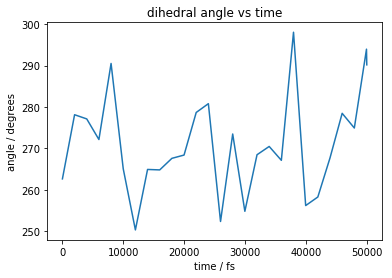

In [25]:
myres = protein.chains[0].residues['PHE47']
plot(traj.time, traj.dihedral(myres['CG'], myres['CB']).to(u.degrees))
title('dihedral angle vs time')
xlabel('time / %s' % u.default.time); ylabel('angle / degrees')

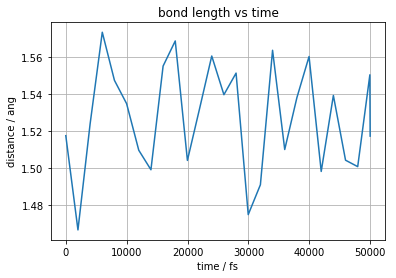

In [27]:
plot(traj.time, traj.distance(myres['CG'], myres['CB']))
plt.title('bond length vs time')
xlabel('time / %s' % u.default.time); ylabel('distance / %s' % u.default.length)